# analyzing effect of starting within range 
Tim Tyree<br>
4.15.2021

In [193]:
from lib.my_initialization import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
data_dir=f"{nb_dir}/data/osg_output/run_5_all.csv"
df=pd.read_csv(data_dir)
# df.head()

In [195]:
#compute derived quantities
df['A']=df['L']**2#domain area
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #Hz/cm^2
df['rate']=df['CollRate']#Hz
#compute dimensionless quantities
df['d']=np.pi*df.r**2*df.q
df['u']=df.w/df.kappa*np.pi*df.r**2
# df['c']=dg.D/(dg.kappa)/dg.A
# df['c']=dg.A

In [196]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A']*10**3 #Hz/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A']*10**3 #Hz/cm^2

In [197]:
#extract available column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s
beta_values=np.array(sorted(set(df.beta.values)))#cm

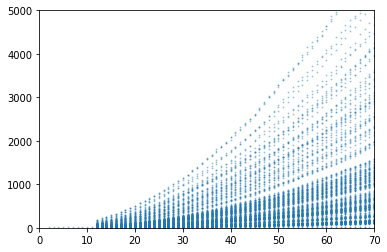

In [198]:
# DONE: show whether Rate increases with N for set_second==1
dg=df.query('set_second==1')
x_values=dg.N.values
y_values=dg.rate.values
plt.scatter(x_values,y_values,alpha=0.3,s=1)
plt.xlim([0,70])
plt.ylim([0,5000])
plt.show()

In [208]:
r_values

array([0.5, 0.6])

In [213]:
#query input parameters
r=r_values[1]#one value
kappa=kappa_values[0]#one value
beta=beta_values[0]#5 values
D=D_values[0]#3 values
query=(df.r==r)&(df.kappa==kappa)&(df.D==D)#&(df.beta==beta)
query&=(df.reflect==1)&(df.set_second==0)
dg=df[query]
dg.head()

,set_second,reflect,r,niter,kappa,dt,beta,N,L,D,Rad,CollRate,A,q,w,rate,d,u
94394,0,1,0.6,250,10,0.00001,0.01,12,4.50000,0.2,NaN,24.477655,20.250000,0.592593,1.208773,24.477655,0.670206,0.136709
94397,0,1,0.6,250,10,0.00001,0.01,12,5.00000,0.2,NaN,19.277792,25.000000,0.480000,0.771112,19.277792,0.542867,0.087211
94400,0,1,0.6,250,10,0.00001,0.01,12,6.24500,0.2,NaN,9.368669,39.000025,0.307692,0.240222,9.368669,0.347992,0.027168
94403,0,1,0.6,250,10,0.00001,0.01,12,7.07107,0.2,NaN,6.197756,50.000031,0.240000,0.123955,6.197756,0.271433,0.014019
94406,0,1,0.6,250,10,0.00001,0.01,12,7.50000,0.2,NaN,5.936207,56.250000,0.213333,0.105533,5.936207,0.241274,0.011935


In [214]:
query2=(dg.d>=1)&(dg.d<=3)
x=dg[query2].d.values
y=dg[query2].u.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.9618953534137074,
 'Delta_m': 0.0500470865410174,
 'b': -0.20099758876413687,
 'Delta_b': 0.035931279520305295,
 'Rsquared': 0.4398516989864467}

In [215]:
#extract xy values
x_values=dg.d.values
y_values=dg.u.values
c_values=dg.beta.values

# generate linear data
ld_values=np.linspace(-10,10,81)
# lu_values=dict_out['m']*ld_values + dict_out['b']
lu_values=2*ld_values + 0
# ld_values



In [216]:
#DONE: plot u versus d. Does the trend still hold near d=1?
#DONE: plot u versus d, coloring by beta

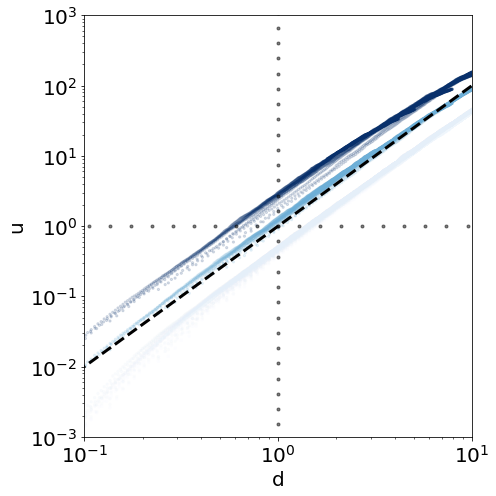

In [217]:
#plot the values
figsize=(7,7)
fontsize=20
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'univ_curve_bgmc_increasing_beta_rbc.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot axes
ax.plot(np.exp(ld_values),1+0*np.exp(lu_values),'.',c='k',lw=3,alpha=.5,label='x axis')
ax.plot(1+0*np.exp(ld_values),np.exp(lu_values),'.',c='k',lw=3,alpha=.5,label='y axis')

#plot results
ax.scatter(x_values,y_values,alpha=0.15,c=c_values, cmap='Blues',s=5,label='simulation')
ax.plot(np.exp(ld_values),np.exp(lu_values),'--',c='black',lw=3,alpha=1.,label='linear fit')

# ax.legend(loc='lower right')


# ax.set_xlim([1e-3,1e+8])
# ax.set_ylim([1e-6,1e+8])
#zoomed
ax.set_xlim([1e-1,1e+1])
ax.set_ylim([1e-3,1e+3])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r'u',fontsize=fontsize)
ax.set_xlabel(r'd', fontsize=fontsize)
# ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
# ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz', fontsize=fontsize)

# #annotate with linear fit
# # eqn_text=u'$\log(u)=2.054(2)\;\log(d)$\n\t\t$- 0.698(1)$\n\t\t$R^2=0.993$'
# ax.annotate(eqn_text, xy=(0.9, 1.1), xytext=(0.15, 10),fontsize=fontsize-8,
#             arrowprops=dict(facecolor='white', shrink=1.0, edgecolor='white'),
#             )

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

__Results__ for log(u) versus log(d)
- increasing beta increases the y intercept, but does not appear to affect the slope
- varying D does not clearly affect y intercept 
- __slope of 2 (indicated by black dashed line) is not clearly affected by beta, reflect, or set_second near d=1__
- subquadratic behavior at high density (d~6) may be observed for large beta ~ 1


# visualize effect of starting within range

In [229]:
#TODO: find w versus q curve that has nonlinear behavior at low density
#TODO: show whether setting set_second==1 affects/linearizes this behavior
#TODO: show whether increasing D removes this behavior
beta_values

array([0.01, 0.05, 0.1 , 0.5 , 1.  ])

In [258]:
#query input parameters
r=r_values[-1]#one value
kappa=kappa_values[0]#one value
beta=beta_values[0]#5 values
D=D_values[-1]#3 values
reflect=0
#extract xy values at low D without set_second
query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
query&=(df.reflect==reflect)&(df.set_second==0)
dg=df[query]
x1_values=dg.q.values
y1_values=dg.w.values

#extract xy values at low D with set_second
query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
query&=(df.reflect==reflect)&(df.set_second==1)
dg=df[query]
x2_values=dg.q.values
y2_values=dg.w.values

# D=D_values[2]#3 values

# #extract xy values at high D without set_second
# query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
# query&=(df.reflect==reflect)&(df.set_second==0)
# dg=df[query]
# x3_values=dg.q.values
# y3_values=dg.w.values

# #extract xy values at high D with set_second
# query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
# query&=(df.reflect==reflect)&(df.set_second==1)
# dg=df[query]
# x4_values=dg.q.values
# y4_values=dg.w.values
dg.head()

,set_second,reflect,r,niter,kappa,dt,beta,N,L,D,Rad,CollRate,A,q,w,rate,d,u
188101,1,0,0.6,250,10,0.00001,0.01,12,4.50000,20.0,0.326069,35.300978,20.250000,0.592593,1.743258,35.300978,0.670206,0.197158
188104,1,0,0.6,250,10,0.00001,0.01,12,5.00000,20.0,0.283741,31.589774,25.000000,0.480000,1.263591,31.589774,0.542867,0.142909
188107,1,0,0.6,250,10,0.00001,0.01,12,6.24500,20.0,0.201654,19.033436,39.000025,0.307692,0.488037,19.033436,0.347992,0.055196
188110,1,0,0.6,250,10,0.00001,0.01,12,7.07107,20.0,0.313870,14.996191,50.000031,0.240000,0.299924,14.996191,0.271433,0.033921
188113,1,0,0.6,250,10,0.00001,0.01,12,7.50000,20.0,0.313347,13.954428,56.250000,0.213333,0.248079,13.954428,0.241274,0.028057


In [259]:
dict_out=compute_95CI_ols(np.log(x1_values),np.log(y1_values))
b=dict_out['b']

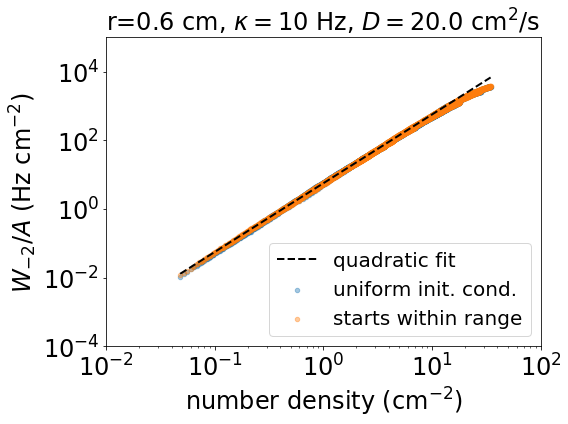

In [260]:
figsize=(8,6)
fontsize=24
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'starts_inside_comparison_pbc_high_D.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot the values
size=20
ax.scatter(x1_values,y1_values,label=f"uniform init. cond.",alpha=0.4,s=size)
ax.scatter(x2_values,y2_values,label=f"starts within range",alpha=0.4,s=size)

x_values=np.array(sorted(x1_values))
ax.plot(x_values,x_values**2*np.exp(b),'--',c='k',label=f"quadratic fit",alpha=1.,lw=2)


# ax.scatter(x3_values,y3_values,label=f"uniform init. cond.",alpha=0.3,s=size)
# ax.scatter(x4_values,y4_values,label=f"starts in range",alpha=0.3,s=size)

#format plot
ax.set_xlim([1e-2,1e+2])
ax.set_ylim([1e-4,1e+5])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
ax.legend(loc='lower right',fontsize=fontsize-4)

ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz, '+r'$D=$'+f'{D} cm'+r'$^2/$s', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

#TODO: split into two panels. 
# (left:starts in range significantly straightens)
# (right:increased D significantly straightens)
#TODO: add error bars given by 1% uncertainty
#TODO: repeat fig with rbc, showing left loses this effect

$$\frac{1}{1+e^{\frac{-||\mathbf{x}_i-\mathbf{x}_j||}{\beta}}}$$

$$
||\mathbf{x}_i-\mathbf{x}_j||
$$

,set_second,reflect,r,niter,kappa,dt,beta,N,L,D,Rad,CollRate,A,q,w,d,u,rate
0,0,0,0.6,250,10,0.00001,0.01,12,4.5,0.2,NaN,27.475879,20.25,0.592593,1.356834,0.670206,0.153454,27.475879
1,0,0,0.6,250,10,0.00001,0.01,12,4.5,2.0,NaN,32.921760,20.25,0.592593,1.625766,0.670206,0.183870,32.921760
2,0,0,0.6,250,10,0.00001,0.01,12,4.5,20.0,NaN,33.586005,20.25,0.592593,1.658568,0.670206,0.187580,33.586005
3,0,0,0.6,250,10,0.00001,0.01,12,5.0,0.2,NaN,21.347661,25.00,0.480000,0.853906,0.542867,0.096575,21.347661
4,0,0,0.6,250,10,0.00001,0.01,12,5.0,2.0,NaN,26.887368,25.00,0.480000,1.075495,0.542867,0.121636,26.887368


In [90]:
#TODO: visualize the effect of rbc
#TODO(later): study multiple D in (i) bgmc and (ii) apparent msd

In [270]:
#query input parameters
r=r_values[-1]#one value
kappa=kappa_values[0]#one value
beta=beta_values[0]#5 values
D=D_values[0]#3 values

#extract xy values at low D without set_second
query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
query&=(df.reflect==0)&(df.set_second==0)
dg=df[query]
x1_values=dg.q.values
y1_values=dg.w.values

query=(df.r==r)&(df.kappa==kappa)&(df.D==D)&(df.beta==beta)
query&=(df.reflect==1)&(df.set_second==0)
dg=df[query]
x2_values=dg.q.values
y2_values=dg.w.values

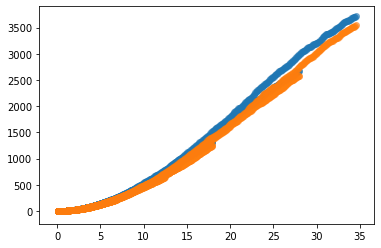

In [271]:
plt.scatter(x1_values,y1_values,alpha=0.3, label='periodic')
plt.scatter(x2_values,y2_values,alpha=0.3, label='reflecting')
plt.show()

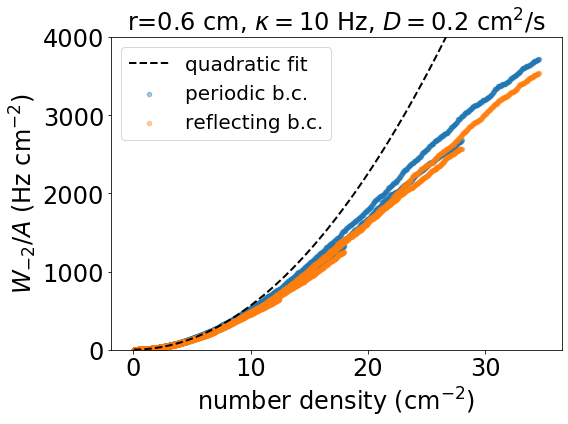

In [277]:
figsize=(8,6)
fontsize=24
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn=f'comparison_rbc_pbc_lin.png'
fig, ax = plt.subplots(ncols=1,figsize=figsize)# ax=axs[1]

#plot the values
size=20
ax.scatter(x1_values,y1_values,label=f"periodic b.c.",alpha=0.4,s=size)
ax.scatter(x2_values,y2_values,label=f"reflecting b.c.",alpha=0.4,s=size)

x_values=np.array(sorted(x1_values))
ax.plot(x_values,x_values**2*np.exp(b),'--',c='k',label=f"quadratic fit",alpha=1.,lw=2)


# ax.scatter(x3_values,y3_values,label=f"uniform init. cond.",alpha=0.3,s=size)
# ax.scatter(x4_values,y4_values,label=f"starts in range",alpha=0.3,s=size)

#format plot
# ax.set_xlim([1e-2,1e+2])
# ax.set_ylim([1e-4,1e+5])
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim([0,4e+3])
ax.set_xlabel(r'number density (cm$^{-2}$)', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}/A$ (Hz cm$^{-2}$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.legend(fontsize=fontsize-6,ncol=2)
ax.legend(loc='upper left',fontsize=fontsize-4)

ax.set_title(f'r={r} cm, '+r'$\kappa=$'+f'{kappa} Hz, '+r'$D=$'+f'{D} cm'+r'$^2/$s', fontsize=fontsize)

fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
#         print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()